In [2]:
%matplotlib inline


# SVM Exercise


A tutorial exercise for using different SVM kernels.

This exercise is used in the `using_kernels_tut` part of the
`supervised_learning_tut` section of the `stat_learn_tut_index`.



In [3]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd

#iris = datasets.load_iris()
df = pd.read_csv('20171113_200_2_3.csv',index_col=0)
#print(df)
#print(df.iloc[:,0:3]) 
#print(df.iloc[:,21:22]) 

#X = iris.data
X = df.iloc[:,0:2]
#print(X)
X = np.array(X)
#print(X)
#X = X.tolist()
#print(type(X))
#X = np.reshape(X,len(X))
#print(X)

#y = iris.target
y = df.iloc[:,21:22]    # ind_tjcr_fin_ult1 信用卡
y = np.array(y)
#print(y)
y=np.reshape(y,len(y))
#print(y)
#print(np.reshape(y,len(y)))

#print(type(y))

Automatically created module for IPython interactive environment


In [4]:
X = X[y != 0, :2]
#print(X)
#y = y[y != 0]
#print(y)

n_sample = len(X)
print(n_sample)    # 48


200


In [5]:
np.random.seed(0)
order = np.random.permutation(n_sample)
#print(order)
X = X[order]
#print(X)
y = y[order].astype(np.float)
#print(y)

In [6]:
X_train = X[:int(.9 * n_sample)]
X_train = X_train.astype(float)
X_train=X_train.reshape(X_train.shape)
print(X_train)
y_train = y[:int(.9 * n_sample)]
print(y_train)
X_test = X[int(.9 * n_sample):]
#print(X_test)
y_test = y[int(.9 * n_sample):]
print(y_test)


[[ 2.  3.]
 [ 3.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 1.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  2.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  3.]
 [ 2.  3.]
 [ 1.  2.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  2.]
 [ 1.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  3.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  2.]
 [ 3.  3.]
 [ 2.  1.]
 [ 2.  3.]
 [ 1.  2.]
 [ 2.  3.]
 [ 1.  2.]
 [ 1.  2.]
 [ 2.  3.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  2.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  2.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  2.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 1.  3.]
 [ 2.  3.]
 [ 3.  2.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  3.]
 [ 1.  1.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  2.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 2.  3.]
 [ 2.  3.]

ValueError: cannot reshape array of size 120000 into shape (200,200)

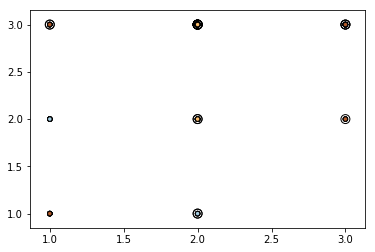

In [7]:
# fit the model
#fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

#lt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

#plt.title(rbf)
plt.show()

ValueError: cannot reshape array of size 120000 into shape (200,200)

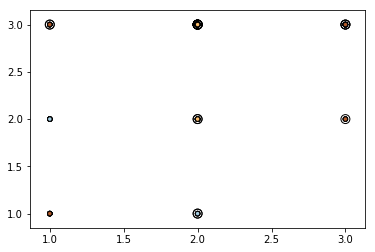

In [8]:
# fit the model
#fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

#lt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

#plt.title(rbf)
plt.show()

ValueError: cannot reshape array of size 120000 into shape (200,200)

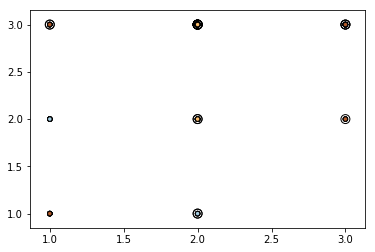

In [9]:
# fit the model
#fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

#lt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

#plt.title(rbf)
plt.show()

In [ ]:
'''
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()
'''